In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting my seaborn style that I'll use
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv('cloud_workload_dataset.csv')

In [3]:
df.head()

,Job_ID,Task_Start_Time,Task_End_Time,CPU_Utilization (%),Memory_Consumption (MB),Task_Execution_Time (ms),System_Throughput (tasks/sec),Task_Waiting_Time (ms),Data_Source,Number_of_Active_Users,Network_Bandwidth_Utilization (Mbps),Job_Priority,Scheduler_Type,Resource_Allocation_Type,Error_Rate (%)
0,JOB_1,2024-01-01 00:00:00,2024-01-01 00:00:00,39.96,3622,2734,9.03,83,IoT,3000,112.97,Low,FCFS,Static,1.65
1,JOB_2,2024-01-01 00:01:00,2024-01-01 00:01:00,86.06,5690,2868,8.03,64,Social Media,4590,329.20,Low,Priority-Based,Dynamic,2.92
2,JOB_3,2024-01-01 00:02:00,2024-01-01 00:02:00,68.56,5075,1311,5.69,971,Cloud,3780,542.82,Low,Priority-Based,Static,2.60
3,JOB_4,2024-01-01 00:03:00,2024-01-01 00:03:00,57.89,7686,875,4.51,757,Social Media,4474,973.94,Medium,Priority-Based,Dynamic,1.33
4,JOB_5,2024-01-01 00:04:00,2024-01-01 00:04:00,22.48,2297,1260,6.38,581,Enterprise DB,1981,405.38,Low,FCFS,Static,1.99


In [4]:
 # Checking for the data types and non-null values
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Job_ID                                5000 non-null   object 
 1   Task_Start_Time                       5000 non-null   object 
 2   Task_End_Time                         5000 non-null   object 
 3   CPU_Utilization (%)                   5000 non-null   float64
 4   Memory_Consumption (MB)               5000 non-null   int64  
 5   Task_Execution_Time (ms)              5000 non-null   int64  
 6   System_Throughput (tasks/sec)         5000 non-null   float64
 7   Task_Waiting_Time (ms)                5000 non-null   int64  
 8   Data_Source                           5000 non-null   object 
 9   Number_of_Active_Users                5000 non-null   int64  
 10  Network_Bandwidth_Utilization (Mbps)  5000 non-null   float64
 11  Job_Priority     

In [5]:
# Identify missing values
df.isnull().sum()  

Job_ID                                  0
Task_Start_Time                         0
Task_End_Time                           0
CPU_Utilization (%)                     0
Memory_Consumption (MB)                 0
Task_Execution_Time (ms)                0
System_Throughput (tasks/sec)           0
Task_Waiting_Time (ms)                  0
Data_Source                             0
Number_of_Active_Users                  0
Network_Bandwidth_Utilization (Mbps)    0
Job_Priority                            0
Scheduler_Type                          0
Resource_Allocation_Type                0
Error_Rate (%)                          0
dtype: int64

In [6]:
# Drop any rows with missing values to clean the dataset 
df.dropna(inplace=True)

In [7]:
# Task 2: Basic Data Analysis

In [8]:
# Display descriptive statistics for all numeric columns
df.describe()

,CPU_Utilization (%),Memory_Consumption (MB),Task_Execution_Time (ms),System_Throughput (tasks/sec),Task_Waiting_Time (ms),Number_of_Active_Users,Network_Bandwidth_Utilization (Mbps),Error_Rate (%)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,49.746602,4218.142800,2509.336800,5.271740,507.632400,2565.994200,499.520224,2.521932
std,23.170651,2142.393544,1415.060641,2.713111,287.408833,1431.848731,283.969648,1.453217
min,10.000000,502.000000,102.000000,0.500000,10.000000,50.000000,10.070000,0.000000
25%,29.510000,2339.000000,1286.750000,2.940000,263.000000,1327.000000,252.487500,1.260000
50%,50.000000,4235.500000,2484.500000,5.290000,506.000000,2614.000000,501.600000,2.520000
75%,69.850000,6039.000000,3731.000000,7.560000,757.000000,3794.250000,744.025000,3.800000
max,89.980000,7998.000000,4999.000000,10.000000,999.000000,4998.000000,999.730000,5.000000


In [9]:
print(df.columns)

Index(['Job_ID', 'Task_Start_Time', 'Task_End_Time', 'CPU_Utilization (%)',
       'Memory_Consumption (MB)', 'Task_Execution_Time (ms)',
       'System_Throughput (tasks/sec)', 'Task_Waiting_Time (ms)',
       'Data_Source', 'Number_of_Active_Users',
       'Network_Bandwidth_Utilization (Mbps)', 'Job_Priority',
       'Scheduler_Type', 'Resource_Allocation_Type', 'Error_Rate (%)'],
      dtype='object')


In [10]:
# Group the data by scheduling strategy and calculate mean execution time per group
df.groupby("Scheduler_Type")["Task_Execution_Time (ms)"].mean()


Scheduler_Type
ASB-Dynamic-CapsNet    2492.950123
FCFS                   2491.388048
Priority-Based         2486.155875
Round Robin            2565.643588
Name: Task_Execution_Time (ms), dtype: float64

In [11]:
# Task 3: Data Visualization

In [12]:
# Line Chart: Task submission trend over time
# Convert the 'Task_Start_Time' column to datetime format
df['Task_Start_Time'] = pd.to_datetime(df['Task_Start_Time'])


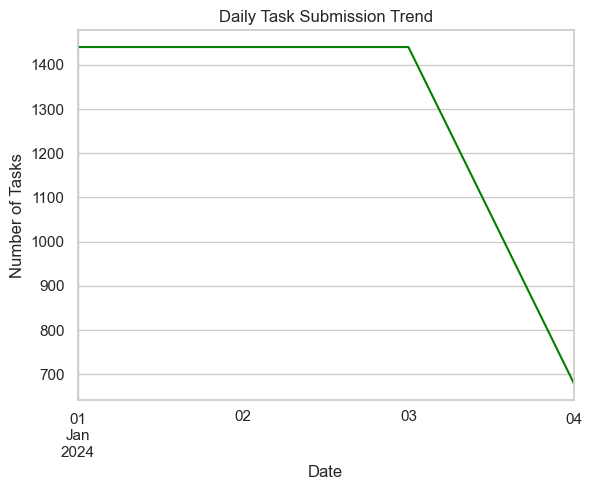

In [13]:
# Resample by day to count how many tasks were submitted each day
# Set 'Task_Start_Time' as index first, then resample and plot

df.set_index('Task_Start_Time').resample('D').size().plot(kind='line',color='green')
plt.title("Daily Task Submission Trend")
plt.xlabel("Date")
plt.ylabel("Number of Tasks")
plt.show()


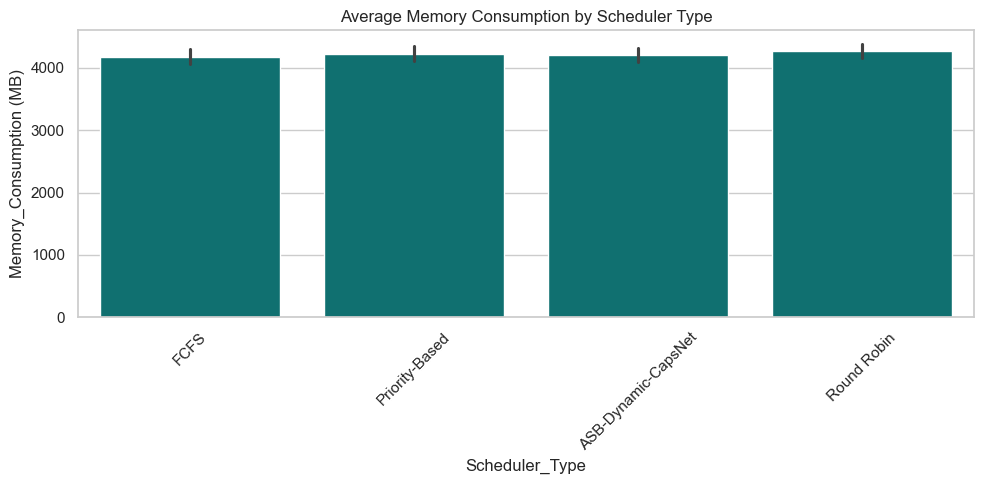

In [14]:
# 2. Bar Chart: Average Memory Consumption by Scheduler Type
plt.figure(figsize=(10,5))
sns.barplot(x='Scheduler_Type', y='Memory_Consumption (MB)', data=df,color='teal')
plt.title('Average Memory Consumption by Scheduler Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

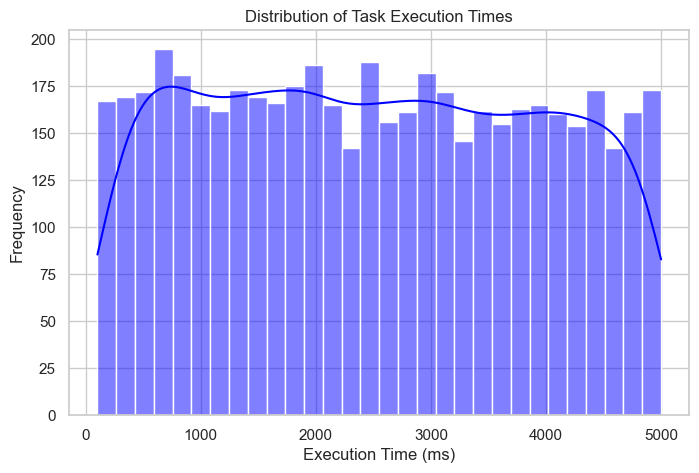

In [15]:
# 3. Histogram: Distribution of Task Execution Times
plt.figure(figsize=(8,5))
sns.histplot(df['Task_Execution_Time (ms)'], bins=30, kde=True,color='blue')
plt.title('Distribution of Task Execution Times')
plt.xlabel('Execution Time (ms)')
plt.ylabel('Frequency')
plt.show()

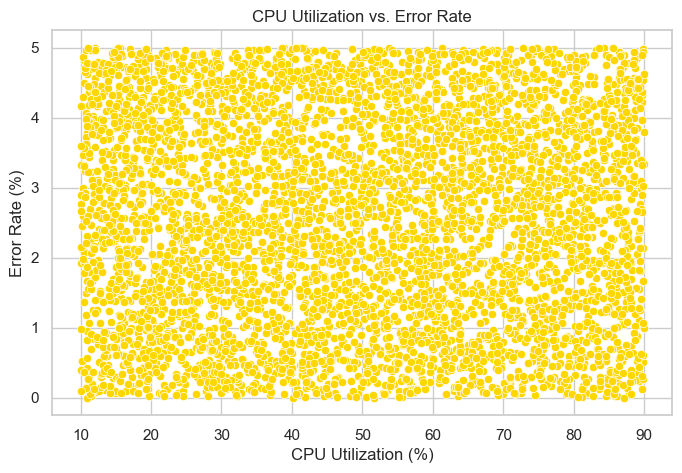

In [16]:
# 4. Scatter Plot: CPU Utilization vs. Error Rate
plt.figure(figsize=(8,5))
sns.scatterplot(x='CPU_Utilization (%)', y='Error_Rate (%)', data=df, color='gold')
plt.title('CPU Utilization vs. Error Rate')
plt.xlabel('CPU Utilization (%)')
plt.ylabel('Error Rate (%)')
plt.grid(True)
plt.show()